## **Car_Insurance_Claim**

**Importing important Libraries and Loading Dataset.**

Numpy:- In this Project we are using 'Numpy' Library for Numbers Operation here.

Pandas:- In this Project we are using 'Pandas' Library for EDA and data related task.

Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.

Seaborn:- With the help of 'Seaborn' we can visualize the data in advanced form.

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loding Dataset
df = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
df

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [4]:
# Deleting the Unnesessary column
del df['ID']
del df['EDUCATION']
del df['AGE']
del df['DRIVING_EXPERIENCE']

In [5]:
# Checking the NUll values
df.isnull().sum()

GENDER                   0
RACE                     0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [6]:
# Filling the Null values
df.CREDIT_SCORE.fillna(df.CREDIT_SCORE.median(), inplace=True)
df.ANNUAL_MILEAGE.fillna(df. ANNUAL_MILEAGE.median(), inplace=True)

In [7]:
#Checking first five rows
df.head()

,GENDER,RACE,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,female,majority,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,male,majority,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,female,majority,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,male,majority,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,male,majority,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [8]:
#Converting categorical data into Numerical data
variable = pd.get_dummies(df.GENDER, prefix='GENDER')
variable1 = pd.get_dummies(df.RACE, prefix='RACE')
variable2 = pd.get_dummies(df.INCOME, prefix='INCOME')
variable3 = pd.get_dummies(df.VEHICLE_TYPE, prefix='VEHICLE_TYPE')
variable4 = pd.get_dummies(df.VEHICLE_YEAR, prefix='VEHICLE_YEAR')
New_dataset = pd.concat([variable,variable1,variable2,variable3,variable4, df], axis='columns')

In [9]:
#Droping categorical column
New_dataset.drop('GENDER', axis='columns', inplace=True)
New_dataset.drop('RACE', axis='columns', inplace=True)
New_dataset.drop('INCOME', axis='columns', inplace=True)
New_dataset.drop('VEHICLE_YEAR', axis='columns', inplace=True)
New_dataset.drop('VEHICLE_TYPE', axis='columns', inplace=True)

In [10]:
New_dataset.head()

,GENDER_female,GENDER_male,RACE_majority,RACE_minority,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,1,0,1,0,0,0,1,0,1,0,1,0,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,0,1,1,0,0,1,0,0,1,0,0,1,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,1,0,1,0,0,0,0,1,1,0,0,1,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,0,1,1,0,0,0,0,1,1,0,0,1,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,0,1,1,0,0,0,0,1,1,0,0,1,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


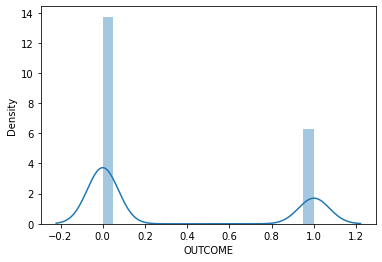

In [11]:
# With the help of 'Seaborn' Visualizing 'OUTCOME' in this Graph.

sns.distplot(New_dataset['OUTCOME'],bins=20)
plt.show()

In [12]:
# Seprating X fetures
X = New_dataset.iloc[:,:-1]
X

,GENDER_female,GENDER_male,RACE_majority,RACE_minority,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,1,0,1,0,0,0,1,0,1,0,1,0,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0
1,0,1,1,0,0,1,0,0,1,0,0,1,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0
2,1,0,1,0,0,0,0,1,1,0,0,1,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0
3,0,1,1,0,0,0,0,1,1,0,0,1,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0
4,0,1,1,0,0,0,0,1,1,0,0,1,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,1,0,0,0,1,0,1,0,0,1,0.582787,1.0,0.0,0.0,10238,16000.0,0,0,1
9996,1,0,1,0,1,0,0,0,1,0,1,0,0.522231,1.0,0.0,1.0,32765,12000.0,1,0,0
9997,0,1,1,0,1,0,0,0,1,0,0,1,0.470940,1.0,0.0,1.0,10238,14000.0,0,0,0
9998,1,0,1,0,0,1,0,0,1,0,0,1,0.364185,0.0,0.0,1.0,10238,13000.0,2,0,1


In [13]:
# Seprating y features
y = New_dataset.iloc[:,-1]
y

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    1.0
9999    0.0
Name: OUTCOME, Length: 10000, dtype: float64

In [14]:
# Coverting flost value into integer
y = y.astype('int64')
y

0       0
1       1
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Name: OUTCOME, Length: 10000, dtype: int64

In [15]:
# Importing train_test_split using Sklearn for split training and test data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [16]:

# Importing LogisticRegression from sklearn and creating a variable.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [17]:
# Fitting model.

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
# Predicting the model on test dataset.

y_pred = model.predict(X_test)

In [19]:
# checking the accuracy score.

model.score(X_test,y_test)


0.7985

#SVM

In [39]:
# Importing Support Vector Machine and using 'Classifier'. 

from sklearn.svm import SVC

In [40]:
# Creating a Class with and using support vector classifier.

support_vector_classifier = SVC(C=1000)


In [41]:
# Fitting up the Model on training dataset.

support_vector_classifier.fit(X_train, y_train)

In [42]:
# Checking the acccuracy score of test data set.

support_vector_classifier.score(X_train, y_train)

0.70675

# Decision Tree

In [43]:
# Importing 'Decision Tree' from sklearn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [44]:
# Creating a Model in Decision Tree and then fitting it.

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
# Checking the accuracy score on Test Data.

model.score(X_test, y_test)


0.7555

#KNN

In [46]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score


In [47]:
from sklearn.neighbors import KNeighborsClassifier


In [48]:
# selecting the K value.

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)


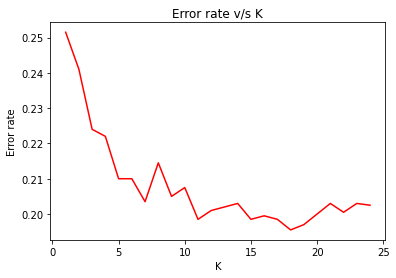

In [49]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()


In [50]:
# here we are doing Model building
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [51]:
# evaluation of Model
confusion_matrix(y_test,y_pred)


array([[1154,  191],
       [ 216,  439]])

In [52]:
accuracy_score(y_test,y_pred)


0.7965

## Seaborn

In [53]:
X.shape

(10000, 21)

In [54]:
y.shape

(10000,)

In [55]:
New_dataset.shape

(10000, 22)

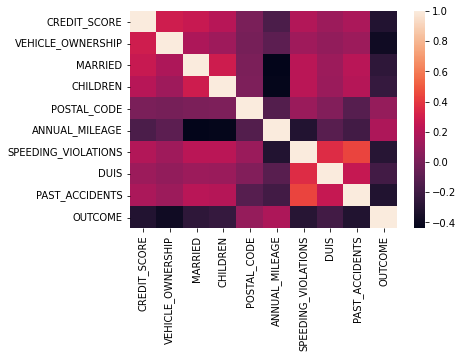

In [56]:
car = df.corr()
sns.heatmap(car)

As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:
* RandomForestClassifier :- As you have seen above in 'RandomForestClassifier' it's providing accuracy level = 79%.
* support_vector_classifier :- As you have seen above in 'support_vector_classifier' it's providing accuracy level = 70%.
* DecisionTreeClassifier :- As you have seen above in 'DecisionTreeClassifier' it's providing accuracy level = 75%.
* KNeighborsClassifier :- As you have seen above in 'KNeighborsClassifier' it's providing accuracy level = 79%.

Note:- So as it clearly mentioned that we are getting higher accuracy level from 'RandomForestClassifier', And ' KNeighborsClassifier'. So we'll use it for our Model.